In [2]:
#import necessary library
#more will be added If required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Introduction

This is a project to detect on credit card fraud using dataset from Kaggle.

## 1. Prepare and Clean The Data ( Data Wrangling )

In [3]:
filename = 'creditcard.csv'

df = pd.read_csv(filename)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
total_true = df[df['Class']==0]
total_true

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
total_fraud = df[df['Class']==1]
total_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


There are 492 frauds recorded on the dataset

In [7]:
#checking if there are any missing values

missing_data = df.isnull()

for a in missing_data.columns.values.tolist():
    print(a)
    print(missing_data[a].value_counts())
    print('')

Time
False    284807
Name: Time, dtype: int64

V1
False    284807
Name: V1, dtype: int64

V2
False    284807
Name: V2, dtype: int64

V3
False    284807
Name: V3, dtype: int64

V4
False    284807
Name: V4, dtype: int64

V5
False    284807
Name: V5, dtype: int64

V6
False    284807
Name: V6, dtype: int64

V7
False    284807
Name: V7, dtype: int64

V8
False    284807
Name: V8, dtype: int64

V9
False    284807
Name: V9, dtype: int64

V10
False    284807
Name: V10, dtype: int64

V11
False    284807
Name: V11, dtype: int64

V12
False    284807
Name: V12, dtype: int64

V13
False    284807
Name: V13, dtype: int64

V14
False    284807
Name: V14, dtype: int64

V15
False    284807
Name: V15, dtype: int64

V16
False    284807
Name: V16, dtype: int64

V17
False    284807
Name: V17, dtype: int64

V18
False    284807
Name: V18, dtype: int64

V19
False    284807
Name: V19, dtype: int64

V20
False    284807
Name: V20, dtype: int64

V21
False    284807
Name: V21, dtype: int64

V22
False    284807
Name: 

In [8]:
#check if there are duplicate values

c_df = df.copy()
c_df.drop_duplicates(subset=None, inplace=True)
c_df.shape

(283726, 31)

In [9]:
#assign new values without duplicates

df = c_df
df.shape

(283726, 31)

All of the datas are filled and no missing and duplicate values

In [10]:
#checking the data type
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

The data has been normalized and no change required

# 2. Exploratory Data Analysis

In [11]:
#finding correlations between columns
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


(0.0, 26975.718)

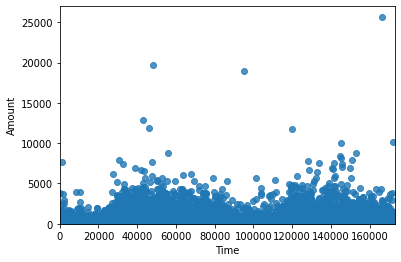

In [12]:
import seaborn as sns

#finding correlation between time and amount
sns.regplot(x='Time',y='Amount', data = df)
plt.ylim(0,)

(0.0, 1.05)

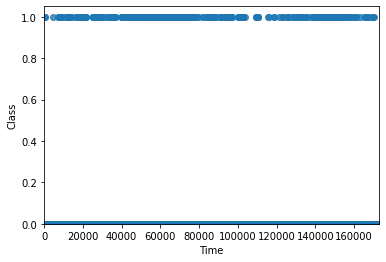

In [13]:
#finding correlation between Time and Class

sns.regplot(x='Time', y='Class', data=df)
plt.ylim(0,)

From the above graph, there are weak relationship between Time, Class and Amount.

In [14]:
#Reveal how many frauds are there 1 (fraud) and 0 (non-fraud)
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

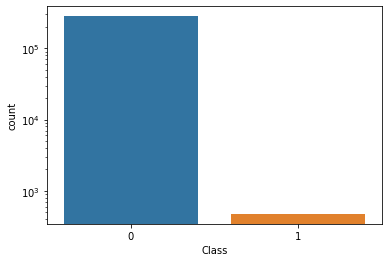

In [15]:
ax=sns.countplot(x='Class',data=df);
ax.set_yscale('log')

## 2.1 Descriptive Statistical Analysis

In [16]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [17]:
from scipy import stats

In [18]:
pearson_coef, p_value = stats.pearsonr(df['Time'],df['Amount'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.010558833743212613  with a P-value of P = 1.8616067063537028e-08


In [19]:
pearson_coef, p_value = stats.pearsonr(df['Time'],df['Class'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.012359339838080801  with a P-value of P = 4.593752491659692e-11


In [20]:
pearson_coef, p_value = stats.pearsonr(df['Amount'],df['Class'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.005777019670480726  with a P-value of P = 0.002089580295276665


Based on the statistical analysis above, there are weak correlations in between Time, Amount, and Class

# 3. Training ML Model

## 3.1 K-Nearest Neighbor

In [21]:
#specified columns to use for estimators
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [24]:
#split train and test dataset

cols = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

X = df[cols].values
y = df['Class'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (226980, 28) (226980,)
Test set: (56746, 28) (56746,)


Train the model using the train and test set above

In [25]:
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn import metrics
ks = 31
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
for i in range(1,ks):
    
    neigh = knc(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    
    mean_acc[i-1] = metrics.accuracy_score(y_test,yhat)
    std_acc[i-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.99941846, 0.99957706, 0.99955944, 0.99954182, 0.99948895,
       0.99948895, 0.99945371, 0.99941846, 0.99941846, 0.99941846,
       0.99943608, 0.99943608, 0.99943608, 0.99943608, 0.99940084,
       0.99941846, 0.99936559, 0.99936559, 0.99936559, 0.99936559,
       0.9992951 , 0.9992951 , 0.9992951 , 0.99927748, 0.99927748,
       0.99927748, 0.99927748, 0.99925986, 0.99925986, 0.99925986])

We can see that most of the models are accurate in k 1 to 30

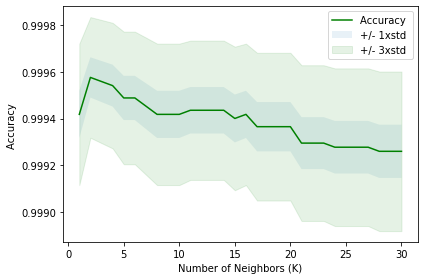

In [26]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [27]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9995770627004547 with k= 2


## 3.2 Logistic Regression

In [31]:
#import LR module from Scikit Learn

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X_2 = df[cols].values
y_2 = df['Class'].values

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, test_size = 0.2, random_state = 4)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train2, y_train2)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [32]:
#predict using the test set
yhat_2 = LR.predict(X_test2)
yhat_2

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
#predict probability
yhat_prob = LR.predict_proba(X_test2)
yhat_prob

array([[0.99682828, 0.00317172],
       [0.99720161, 0.00279839],
       [0.99748512, 0.00251488],
       ...,
       [0.99724045, 0.00275955],
       [0.99755546, 0.00244454],
       [0.9960693 , 0.0039307 ]])

In [34]:
#using jaccard to measure accuracy of the model
from sklearn.metrics import jaccard_score
jaccard_score(y_test2, yhat_2,pos_label=0)

0.9992415021784763

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test2, yhat_2, labels=[1,0]))

[[   55    29]
 [   14 56648]]


Confusion matrix, without normalization
[[   55    29]
 [   14 56648]]


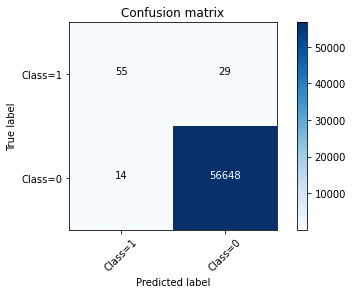

In [37]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test2, yhat_2, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Class=1','Class=0'],normalize= False,  title='Confusion matrix')

In [38]:
print (classification_report(y_test2, yhat_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56662
           1       0.80      0.65      0.72        84

    accuracy                           1.00     56746
   macro avg       0.90      0.83      0.86     56746
weighted avg       1.00      1.00      1.00     56746



In [39]:
#LogLoss 
from sklearn.metrics import log_loss
log_loss(y_test2, yhat_prob)

0.006509978529620348

Based on the dataset above, there are not many people who will conduct  a fraudulent act on credit card.

## 3.3 SVM ( Support Vector Machines )

In [41]:
#import necessary module for this ML Model
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

#create new dataset for train and test
X_3 = df[cols].values 
y_3 = df['Class'].values

X_train3 ,X_test3, y_train3, y_test3 = train_test_split(X_3, y_3, test_size = 0.2, random_state = 4)

In [42]:
#train SVM model using linear kernel
clf = svm.SVC(kernel='linear')
clf.fit(X_train3,y_train3)

SVC(kernel='linear')

In [43]:
yhat_3 = clf.predict(X_test3)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [44]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56662
           1       0.77      0.81      0.79        84

    accuracy                           1.00     56746
   macro avg       0.89      0.90      0.90     56746
weighted avg       1.00      1.00      1.00     56746

Confusion matrix, without normalization
[[   68    16]
 [   20 56642]]


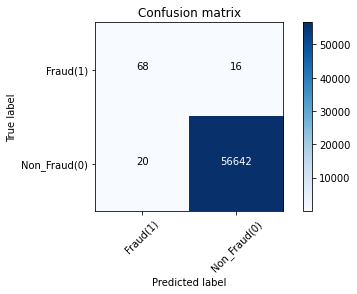

In [46]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test3, yhat_3, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test3, yhat_3))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud(1)','Non_Fraud(0)'],normalize= False,  title='Confusion matrix')

In [48]:
#F1 Score & Jaccard Score for evaluation

from sklearn.metrics import f1_score, jaccard_score
print("Avg F1-score: %.4f" % f1_score(y_test3, yhat_3, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test3, yhat_3,pos_label=1))

Avg F1-score: 0.9994
Jaccard score: 0.6538


# 4. Summary

In this notebook, we have trained 3 different models to detect fraud on Credit Card using dataset from Kaggle.

Based on the evaluation, the model has achieved an acceptable accuracy to predict the upcoming result ( in this case Fraud or Non-Fraud ). But, the model has to be re-trained in the future If there are new datasets that are similar to the data used in this project.